This project is an implementation of the innovative techniques presented in the research "Transfer Learning from Speaker Verification to Multispeaker Text-To-Speech Synthesis (SV2TTS) with a vocoder that works in real-time. A neural network is used to generate a speaker embedding from audio data. This embedding is then used by a neural text-to-speech (TTS) system to produce audio that mimics the input voice with given text.

**Project Objectives:**

- Voice Recording: Capture a sample of your voice to serve as the foundation for the voice cloning process.

- Experimentation: Test various inputs for speaker embeddings and text to evaluate the effectiveness of the voice cloning system.

- Analysis: Compare the spectrograms of the original and synthesized audio to visually assess how closely the cloned voice matches the original.

# Dependencies

In [ ]:
!git clone https://github.com/CorentinJ/Real-Time-Voice-Cloning.git
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install -r Real-Time-Voice-Cloning/requirements.txt -q
!pip install --upgrade matplotlib

Cloning into 'Real-Time-Voice-Cloning'...
remote: Enumerating objects: 2671, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2671 (delta 0), reused 1 (delta 0), pack-reused 2668
Receiving objects: 100% (2671/2671), 361.01 MiB | 36.54 MiB/s, done.
Resolving deltas: 100% (1435/1435), done.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ub

In [ ]:
# used to play audio files as in HW1
import IPython.display as ipd
from base64 import b64decode
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=5):
  try:
    from google.colab import output
  except ImportError:
    print('No possible to import output from google.colab')
    return ''
  else:
    print('Recording')
    display(ipd.Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    fname = 'recorded_audio.wav'
    print('Saving to', fname)
    b = b64decode(s.split(',')[1])
    with open(fname, 'wb') as f:
      f.write(b)
    return fname


# helper function to plot a mel spectrogram
# arguments: (wave array, sampling rate, number of mel bins, max frequency of mel scale)
def plot_melspectrogram(wav, sr, annotations=None, n_mels=256, fmax=4096,
                        fig=None, ax=None, show_legend=True):

    if ax == None:
        fig, ax = plt.subplots(1,1,figsize=(20,5))
    M = librosa.feature.melspectrogram(y=wav, sr=sr, n_mels=n_mels, fmax=fmax, n_fft=2048)
    M_db = librosa.power_to_db(M, ref=np.max)
    img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax, fmax=fmax)
    if show_legend:
        ax.set(title='Mel spectrogram display')
        fig.colorbar(img, ax=ax, format="%+2.f dB")

    # iterate over list of text annotations and draw them
    if annotations is not None:
        for x,y,text in annotations:
            ax.annotate(
            text,
            xy=(x,y), xycoords='data',
            xytext=(10, -50), textcoords='offset pixels',
            horizontalalignment='right',
            color='white',
            fontsize=20,
            verticalalignment='bottom',
            arrowprops=dict(
                arrowstyle= '-|>',
                 color='white',
                 lw=1,
                 ls='-')
            )

# Record and clone **your** voice

In this colab, we'll be poking around a [toolkit](https://github.com/CorentinJ/Real-Time-Voice-Cloning) for cloning your own voice. It's important that we only use this tool for good--do **not** record others without their permission.

Note: if recording your voice doesn't work, feel free to comment on one of the examples in the `Real-Time-Voice-Cloning/samples` directory.


## Record your voice and plot a spectrogram.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
record(20)
input_path = 'recorded_audio.wav'
ipd.Audio(input_path)

Recording


<IPython.core.display.Javascript object>

Saving to recorded_audio.wav


<ipython-input-28-cf882cade55c>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  input_wav, input_sr = librosa.load(input_path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


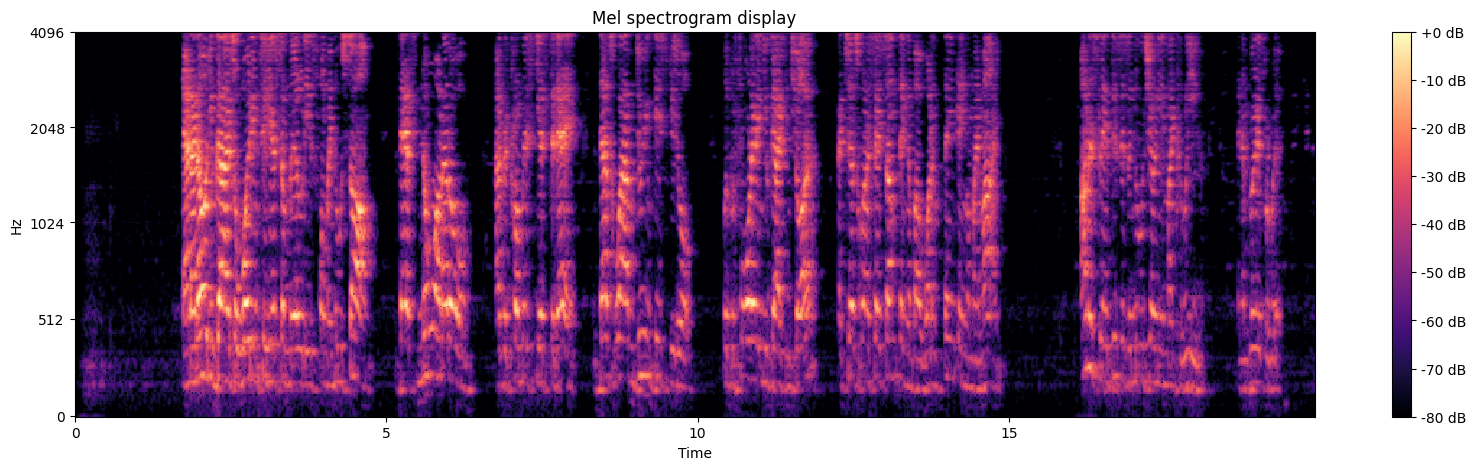

In [ ]:
input_wav, input_sr = librosa.load(input_path)
plot_melspectrogram(input_wav, input_sr)

Now use the tool to synthesize the exact same words you said.

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.3 MB/s eta 0:00:00


In [ ]:
# If the downloads fail, try again after a minute or run this commented code.
# You can also download the models locally and manually drag them into the
# colab file structure
!gdown --folder 1fU6umc5uQAVR2udZdHX-lDgXYzTyqG_j
!mv /content/RTVC\ models /content/default
!mv default Real-Time-Voice-Cloning/saved_models/default



In [ ]:
!pip install sounddevice

In [ ]:
# Use the stop button or Runtime->Interrupt Execution when finished
# Please click into the output cell to enter the path when prompted
!python Real-Time-Voice-Cloning/demo_cli.py

/content/Real-Time-Voice-Cloning/encoder/audio.py:13: UserWarning: Unable to import 'webrtcvad'. This package enables noise removal and is recommended.
  warn("Unable to import 'webrtcvad'. This package enables noise removal and is recommended.")
Arguments:
    enc_model_fpath:   saved_models/default/encoder.pt
    syn_model_fpath:   saved_models/default/synthesizer.pt
    voc_model_fpath:   saved_models/default/vocoder.pt
    cpu:               False
    no_sound:          False
    seed:              None

Running a test of your configuration...

Found 1 GPUs available. Using GPU 0 (Tesla T4) of compute capability 7.5 with 15.8Gb total memory.

Preparing the encoder, the synthesizer and the vocoder...
Loaded encoder "encoder.pt" trained to step 1564501
Synthesizer using device: cuda
Building Wave-RNN
Trainable Parameters: 4.481M
Loading model weights at saved_models/default/vocoder.pt
Testing your configuration with small inputs.
	Testing the encoder...
	Testing the synthesizer... (l

## Run voice conversion and plot some output

Run the voice conversion steps above on your audio sample. This should render an audio file with a TTS system producing the requested output using the requested speaker embedding.

Play the audio file and plot a spectrogram.

In [ ]:
output_path = 'demo_output_00.wav' # change this as necessary
ipd.Audio(output_path)

ValueError: ignored

## Compare spectrograms of original and synthesized audio.

Plot spectrograms for your original utterance and synthesized utterance next to one another. Describe the differences you notice when listening in the audio, and how you think such differences register in the spectrogram plot.

# Try variations of input examples

Now that we've gotten the hang of it, please use the tool to comment on what you notice from the audio and mel spectrogram for some of these situations (these are just ideas, you may choose what you actually try):

1. Speak very monotone and synthesize the exact same words you said.
1. Speak very expressively and synthesize the exact same words you said.
1. Speak a fixed input and synthesize a phrase with common words, then using the same input synthesize a phrase with rare words.

## Try at least 2 input variations.

Try two different input audio files and/or input audio / transcription request pairing. See how the voice cloning system responds when you are more expressive, accented, or when synthesizing non-standard words (e.g. technical jargon with TTS pronunciation errors).

Run voice conversion on two new examples.

## Comment on what you notice from the mel spectrograms and audio.

For the new examples you just generated, comment on your findings about how the voice conversion system responds when you alter inputs used to build the samples (input text or audio samples).

Show at least two spectrograms and comment on your findings about how the system works for the types of inputs you tried.